In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval


from collections import OrderedDict

In [12]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#E69F00",
    "Stouffer":"#D44400",
    "REM":"#009E73",
    "RankProd":"#2E5EAA"
})

In [13]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

# Plot boxplot

In [14]:
# Function to load data based on mode
def load_data(mode):
    rmse_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/RMSE.csv", index_col=0).T
    nrmse_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/NRMSE.csv", index_col=0).T
    r_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/r.csv", index_col=0).T
    rho_pv_df = pd.read_csv(f"{root_dir}{mode}/aggreagated/rho.csv", index_col=0).T
    return rmse_pv_df, nrmse_pv_df, r_pv_df, rho_pv_df

In [15]:
def plot_data(datasets, color_dict, titles, row_titles, figsize=(13, 7), grid_style='--', grid_width=0.5):
    fig, axes = plt.subplots(nrows=len(datasets), ncols=len(titles), figsize=figsize, sharey='col')
    
    for row, (data, row_title) in enumerate(zip(datasets, row_titles)):
        if row == 0:
            vertical_position = 0.72 - (row / 2) 
        else:
            vertical_position = 0.78 - (row / 2) 
        fig.text(0.02, vertical_position, row_title, va='center', ha='left', fontsize=12, rotation='vertical', transform=fig.transFigure)
        
        for col, (df, title) in enumerate(zip(data, titles)):
            ax = axes[row, col]
            for i, (method, color) in enumerate(color_dict['Methods'].items()):
                bp = ax.boxplot(df.loc[method], positions=[i], widths=0.6, patch_artist=True,
                                boxprops=dict(facecolor=color))
            ax.set_xticks(range(len(color_dict['Methods'])))
            ax.set_xticklabels(color_dict['Methods'].keys())  # Optional rotation
            ax.set_title(f"{title}")
            ax.set_ylabel('Value for -log10(adj.p-val)' if title == 'RMSE' else '')
            ax.grid(True, which='both', linestyle=grid_style, linewidth=grid_width)
    
    plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.suptitle('Comparison of Methods Across Different Metrics and Conditions')
    plt.show()


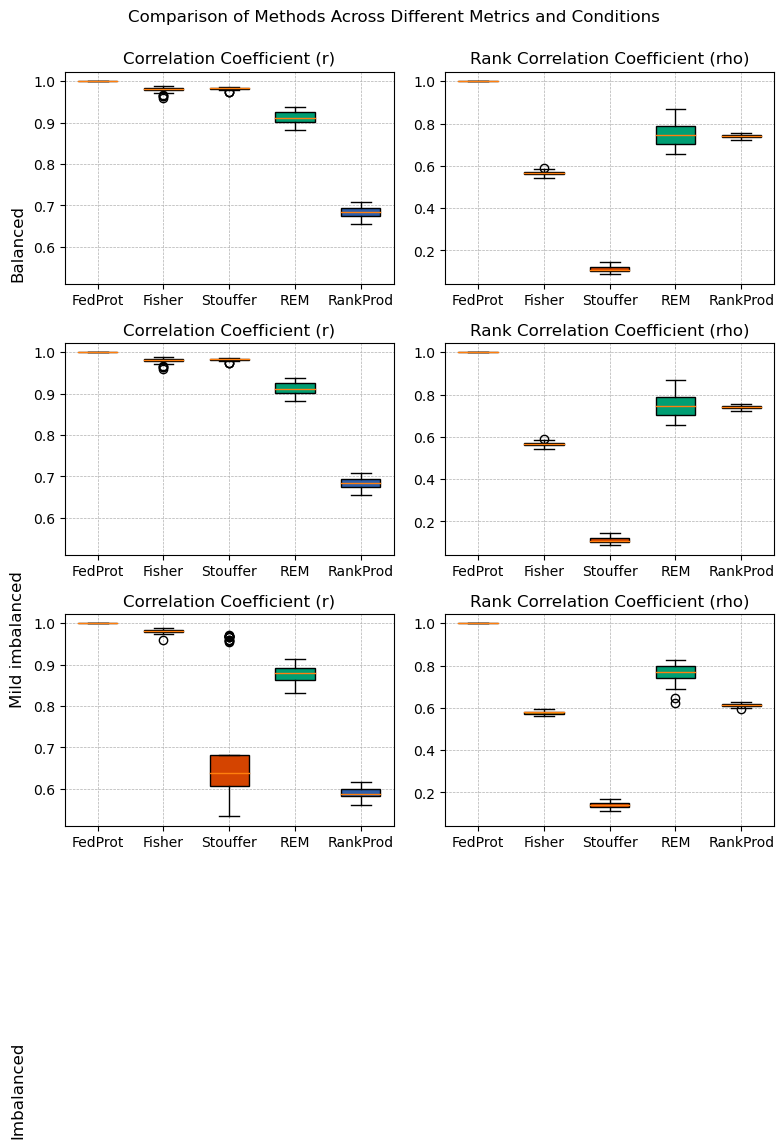

In [16]:
_, _, r_pv_df_bal, rho_pv_df_bal = load_data("mild_imbalanced")
_, _, r_pv_df_mibal, rho_pv_df_mibal = load_data("mild_imbalanced")
_, _, r_pv_df_imbal, rho_pv_df_imbal = load_data("imbalanced")

# Titles for each subplot
titles = ['Correlation Coefficient (r)', 'Rank Correlation Coefficient (rho)']
row_titles = ['Balanced', 'Mild imbalanced', 'Imbalanced']

# Plotting data grouped by scenario
datasets = [(r_pv_df_bal, rho_pv_df_bal), (r_pv_df_mibal, rho_pv_df_mibal), (r_pv_df_imbal, rho_pv_df_imbal)]

# Call the function
plot_data(datasets, color_dict, titles, row_titles, figsize=(8, 9))

# Plot correlations

In [17]:
def log_transform_df(df):
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    return df

Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/balanced/results with 6000 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/mild_imbalanced/results with 6000 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/simulated/imbalanced/results with 5998 genes. Adj.p-values were not log-transformed.
Plotting corrs using p-vals - log-transformed.


(5998, 12)


Balanced           Mild_imbalanced           Imbalanced          
                 r         ρ               r         ρ          r         ρ
FedProt   1.000000  1.000000        1.000000  1.000000   1.000000  1.000000
Fisher    0.983622  0.574510        0.964681  0.573069   0.977418  0.576803
Stouffer  0.988490  0.157537        0.974420  0.098107   0.631666  0.110267
REM       0.943740  0.707372        0.903244  0.708784   0.885905  0.621640
RankProd  0.731324  0.786675        0.684007  0.739600   0.585714  0.613020

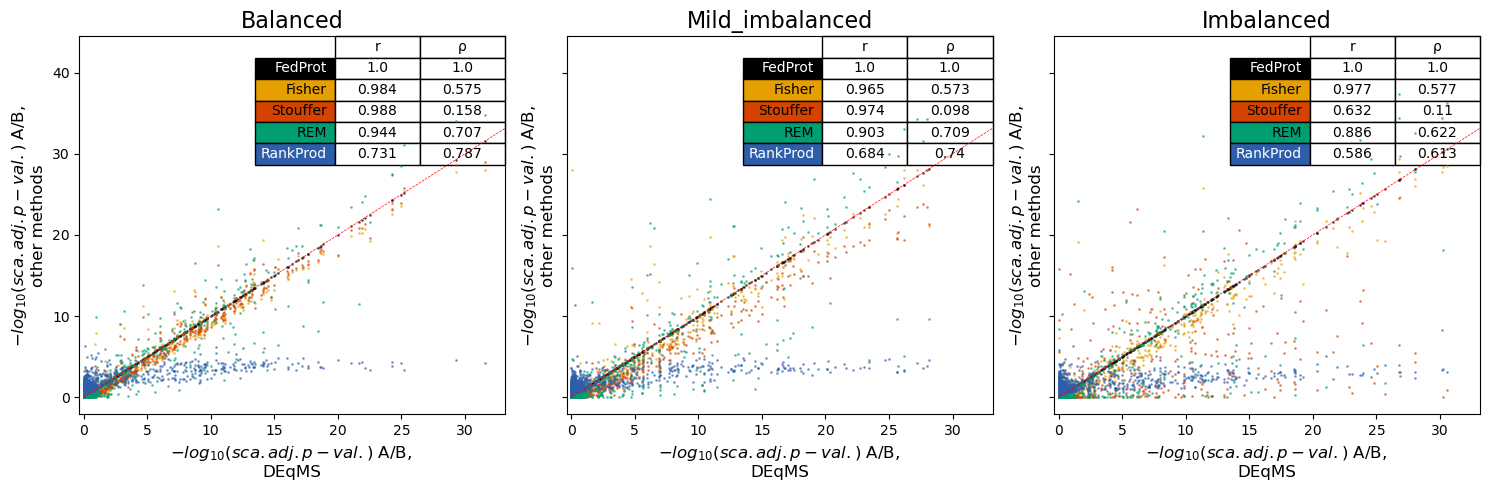

In [18]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"

dfs = {}

fedprot_name="DPE.tsv"
deqms_name="res.tsv"
fisher_name="MA_CM.tsv"
rem_name="MA_REM.tsv"
stouffer_name="MA_Stouffer.tsv"
rankprod_name="MA_RankProd.tsv"


prefix = f"/36_"

workdir = root_dir + "balanced/results" 
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Balanced"] = df

workdir = root_dir + "mild_imbalanced/results" 
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Mild_imbalanced"] = df

workdir = root_dir + "imbalanced/results"
df = fp_eval.read_results(workdir,
    fedprot_name=f"{prefix}{fedprot_name}",
    deqms_name=f"{prefix}{deqms_name}",
    fisher_name=f"{prefix}{fisher_name}",
    rem_name=f"{prefix}{rem_name}",
    stouffer_name=f"{prefix}{stouffer_name}",
    rankprod_name=f"{prefix}{rankprod_name}"
)
dfs["Imbalanced"] = df


print(dfs["Imbalanced"].shape)
dfs["Imbalanced"].head(4)

log_dfs = {k: log_transform_df(v) for k,v in dfs.items()}

fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["Balanced", "Mild_imbalanced", "Imbalanced"],
    comparsions = ["A/B", "A/B", "A/B"],
    add_table=True,
    figsize=(15, 5),
)


Plotting corrs using logFC values.


Balanced           Mild_imbalanced           Imbalanced          
                 r         ρ               r         ρ          r         ρ
FedProt   1.000000  1.000000        1.000000  1.000000   1.000000  1.000000
Fisher    0.998277  0.996966        0.914629  0.849749   0.666945  0.598005
Stouffer  0.998277  0.996966        0.914629  0.849749   0.666945  0.598005
REM       0.969114  0.963897        0.954777  0.939882   0.892567  0.865155
RankProd  0.998277  0.996966        0.914629  0.849749   0.666945  0.598005

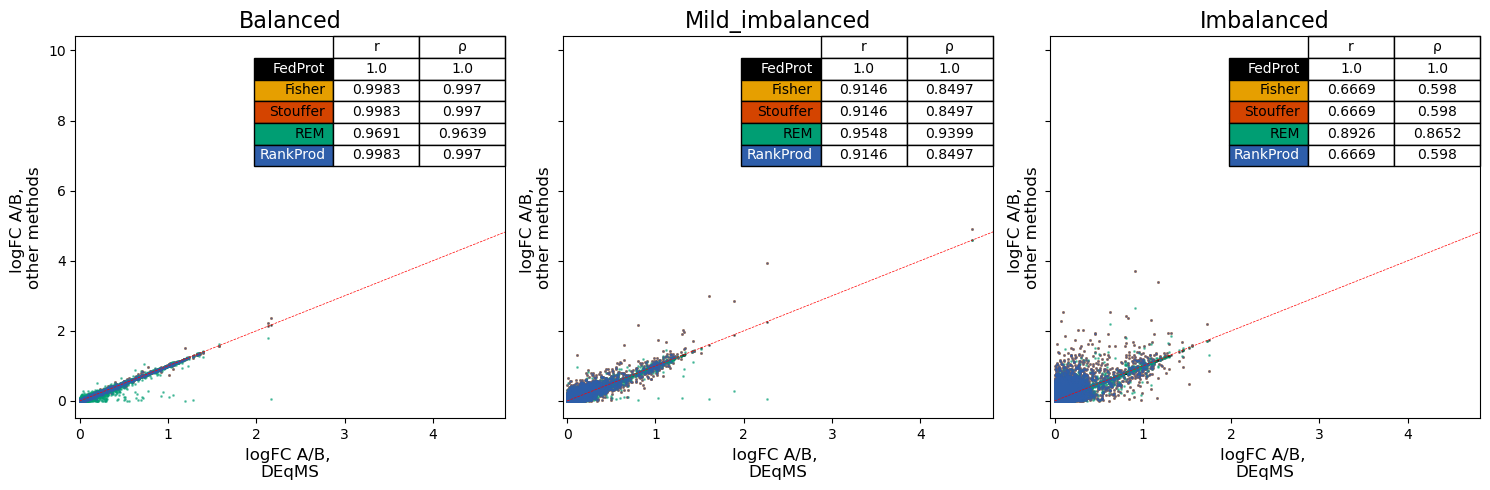

In [19]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=["Balanced", "Mild_imbalanced",  "Imbalanced"],
    comparsions = ["A/B", "A/B", "A/B"],
    add_table=True,
    figsize=(15, 5),
)


# Jaccard plot

In [20]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/simulated/"
jaccard_topN_dfs ={

    "Balanced": pd.read_csv(f"{root_dir}balanced/aggreagated/jaccard_topN.csv", index_col=[1]),
    "Mild imbalanced": pd.read_csv(f"{root_dir}mild_imbalanced/aggreagated/jaccard_topN.csv", index_col=[1]),
    "Imbalanced": pd.read_csv(f"{root_dir}imbalanced/aggreagated/jaccard_topN.csv", index_col=[1])
}

# remove Unnamed: 0 column
for k, df in jaccard_topN_dfs.items():
    df.drop(df.columns[0], axis=1, inplace=True)


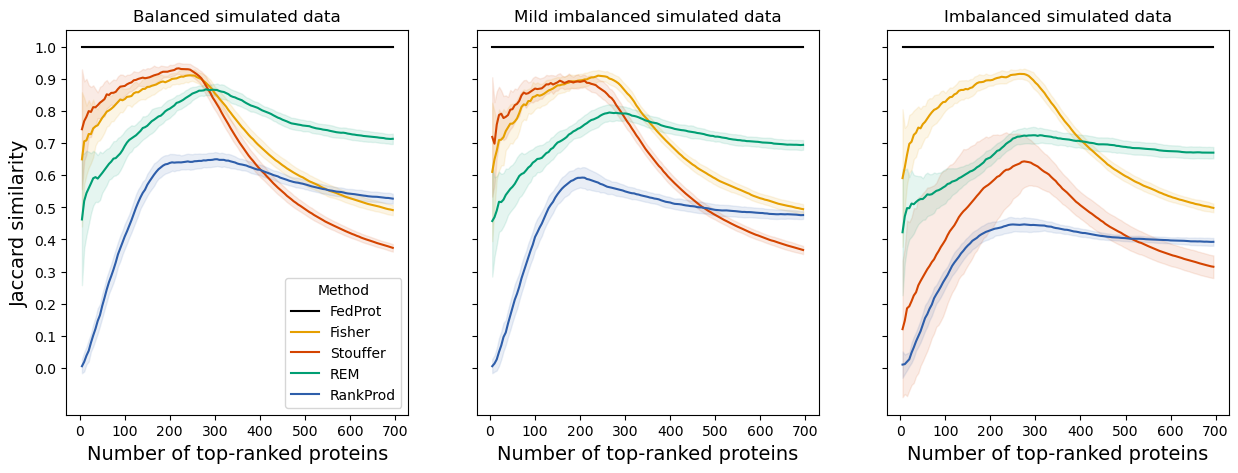

In [22]:
fp_eval.plot_with_confidence(
    jaccard_topN_dfs,
    ["FedProt", "Fisher", "Stouffer", "REM", "RankProd"], 
    color_dict,
    num_top_genes=list(jaccard_topN_dfs['Balanced'].columns),
    figsize=(15, 5)
)
